In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Cargar data

In [2]:
data = np.load('data/proyecto_training_data.npy')

In [3]:
data[1]

array([1.815e+05, 6.000e+00, 1.262e+03, 6.000e+00, 1.976e+03, 8.000e+01])

## Separar data
Separar datos en un set de entrenamiento y un set para validación y pruebas.

In [4]:
entrenamiento_len = int(len(data) * 0.8)

In [5]:
sel = np.random.choice(data.shape[0], size=entrenamiento_len, replace=False)

In [6]:
entrenamiento = pd.DataFrame(data[sel], columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [7]:
unsel = list(set(range(data.shape[0])) - set(sel))

In [8]:
validacion = pd.DataFrame(data[unsel], columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

## Análisis exploratorio

Estadísticas descriptivas

In [9]:
entrenamiento.describe(include='all')

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,964.000000
mean,180801.356164,6.090753,1167.966610,6.525685,1971.440068,69.761411
std,80005.970594,1.389266,391.651004,1.636460,30.088584,24.336835
min,34900.000000,1.000000,480.000000,3.000000,1872.000000,21.000000
25%,129975.000000,5.000000,886.750000,5.000000,1954.000000,59.000000
50%,162250.000000,6.000000,1086.000000,6.000000,1973.000000,69.000000
75%,213625.000000,7.000000,1414.000000,7.000000,2000.250000,80.000000
max,745000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Rango peak-to-peak

In [10]:
entrenamiento.max() - entrenamiento.min()

SalePrice       710100.0
OverallQual          9.0
1stFlrSF          4212.0
TotRmsAbvGrd        11.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64

Histogramas

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

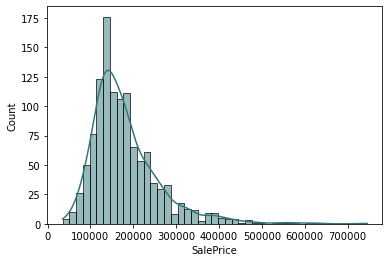

In [11]:
sns.histplot(data = entrenamiento, x = "SalePrice", kde = True, color = "#33777b")

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

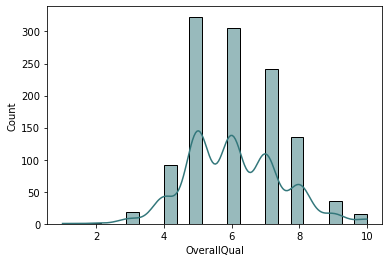

In [12]:
sns.histplot(data = entrenamiento, x = "OverallQual", kde = True, color = "#33777b")

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

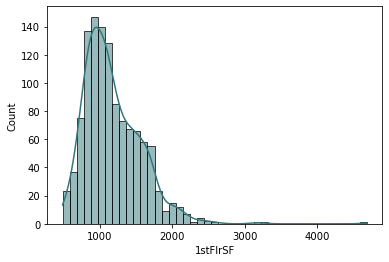

In [13]:
sns.histplot(data = entrenamiento, x = "1stFlrSF", kde = True, color = "#33777b")

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

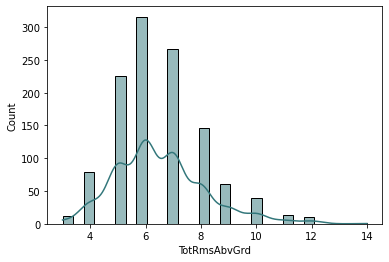

In [14]:
sns.histplot(data = entrenamiento, x = "TotRmsAbvGrd", kde = True, color = "#33777b")

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

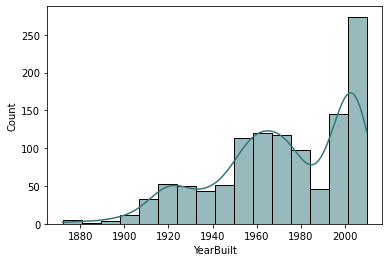

In [15]:
sns.histplot(data = entrenamiento, x = "YearBuilt", kde = True, color = "#33777b")

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

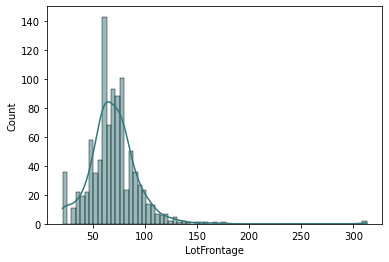

In [16]:
sns.histplot(data = entrenamiento, x = "LotFrontage", kde = True, color = "#33777b")

Coeficientes de correlación

In [17]:
coeficientes_corr = entrenamiento.corr( ).iloc[0:1, 1:]
coeficientes_corr

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,0.800358,0.597811,0.526724,0.525425,0.354411


Scatterplots

In [18]:
#coeficientes_corr.OverallQual
round(float(coeficientes_corr['OverallQual']), 3)
# make a function?

0.8

Text(0, 0.5, 'Precio de venta')

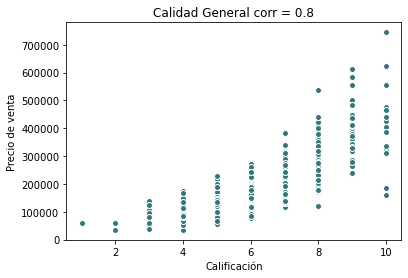

In [19]:
OverallQual_corr = round(float(coeficientes_corr['OverallQual']), 3)
plt.scatter(x = entrenamiento['OverallQual'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Calidad General corr = {corr}'.format(corr = OverallQual_corr))
plt.xlabel('Calificación')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

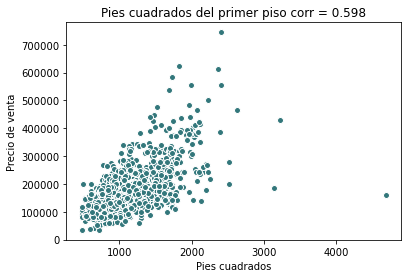

In [20]:
FirtFlr_corr = round(float(coeficientes_corr['1stFlrSF']), 3)
plt.scatter(x = entrenamiento['1stFlrSF'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Pies cuadrados del primer piso corr = {corr}'.format(corr = FirtFlr_corr))
plt.xlabel('Pies cuadrados')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

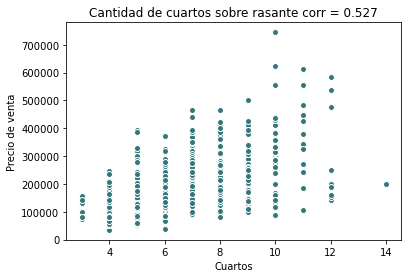

In [21]:
TotRms_corr = round(float(coeficientes_corr['TotRmsAbvGrd']), 3)
plt.scatter(x = entrenamiento['TotRmsAbvGrd'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Cantidad de cuartos sobre rasante corr = {corr}'.format(corr = TotRms_corr))
plt.xlabel('Cuartos')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

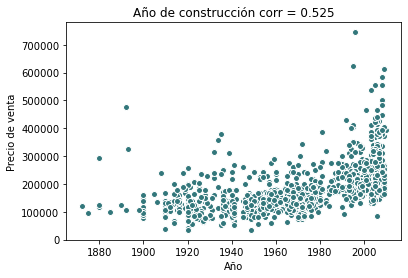

In [22]:
YearBuilt_corr = round(float(coeficientes_corr['YearBuilt']), 3)
plt.scatter(x = entrenamiento['YearBuilt'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Año de construcción corr = {corr}'.format(corr = YearBuilt_corr))
plt.xlabel('Año')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

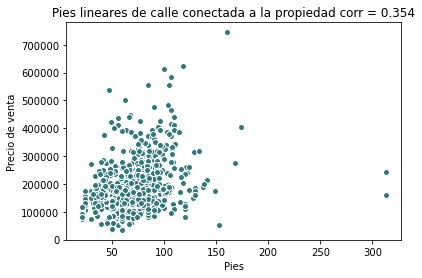

In [23]:
Lot_corr = round(float(coeficientes_corr['LotFrontage']), 3)
plt.scatter(x = entrenamiento['LotFrontage'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Pies lineares de calle conectada a la propiedad corr = {corr}'.format(corr = Lot_corr))
plt.xlabel('Pies')
plt.ylabel('Precio de venta')

Seleccionar 2 variables con más potencial predictivo:
Overall Quality
First floor square feet

In [24]:
def regresion_lineal_manual(x, y, epochs, imprimir_error_cada, lr):

    return ""

In [25]:
entrenamiento_regresion_lineal(1, 1, 1, 1, 1)

'hi'

In [ ]:
def graficar_error(vector_errores):

    return ""

In [ ]:
def graficar_modelo(datos_modelo, n):
    return ""

Entrenando un modelo con Scikit-learn


In [32]:
x1 = entrenamiento['OverallQual'].values
x2 = entrenamiento['1stFlrSF'].values
y = entrenamiento['SalePrice'].values


In [33]:
print(x1.shape, x2.shape, y.shape)

(1168, 1) (1168, 1) (1168,)


In [38]:
regresion1 = LinearRegression().fit(x1.reshape((-1, 1)), y)
regresion2 = LinearRegression().fit(x2.reshape((-1, 1)), y)

In [39]:
r_sq1 = regresion1.score(x1, y)
r_sq2 = regresion2.score(x2, y)


print('coefficient of determination:', r_sq1, r_sq2)

coefficient of determination: 0.6405732408541889 0.35737804947442386


In [40]:
print('intercept:', regresion1.intercept_)
print('slope:', regresion1.coef_)

intercept: -99930.95187815031
slope: [46091.556901]


In [41]:
print('intercept:', regresion2.intercept_)
print('slope:', regresion2.coef_)

intercept: 38169.17666205007
slope: [122.12008317]


In [44]:
y_hat1 = regresion1.predict(x1)
print('predicted response:', y_hat1, sep='\n')

y_hat12 = regresion1.intercept_ + regresion1.coef_ * x1
print('predicted response:', y_hat12, sep='\n')

predicted response:
[268801.50332981 130526.83262683 176618.38952782 ... 130526.83262683
 176618.38952782 268801.50332981]
predicted response:
[[268801.50332981]
 [130526.83262683]
 [176618.38952782]
 ...
 [130526.83262683]
 [176618.38952782]
 [268801.50332981]]


In [43]:
y_hat2 = regresion2.predict(x2)
print('predicted response:', y_hat2, sep='\n')

predicted response:
[151374.49376027 155404.45650487 208160.33243414 ... 160167.13974848
  97153.17683297 201565.84794298]


References
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://realpython.com/linear-regression-in-python/

https://www.kite.com/python/answers/how-to-convert-a-column-in-a-pandas-dataframe-to-a-numpy-array-in-python